<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Digit_LDAHandson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LDA-** **Linear Discriminant Analysis**

- It is a dimensionality reduction technique

- It's main goal is to maximize class separability

- It is supervised machine learning algorithm which uses class label

In [ ]:
# Class separability means how clearly one group is separated from another group

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()

In [ ]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
df['Target'] = data.target

In [ ]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
# total number of unique values in target column-
df['Target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# divide the data into x and y
# then perform train_test_Split

In [ ]:
x = df.drop('Target',axis=1)
y = df['Target']

In [ ]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=3)

In [ ]:
x_train.shape

(1437, 64)

In [ ]:
y_train.shape

(1437,)

In [ ]:
x_test.shape

(360, 64)

**LDA uses Distance** , and if we are having data/features with different scale or different unit , then here -> we have to use standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#  we do not use fit on x_test because we don't need to recalculate mean or std , i.e there is no need to learn something

In [ ]:
x_train

array([[ 0.        , -0.33276933, -0.24176745, ..., -0.83613001,
        -0.51733142, -0.20010488],
       [ 0.        , -0.33276933, -1.08043933, ...,  1.1934626 ,
        -0.51733142, -0.20010488],
       [ 0.        , -0.33276933, -1.08043933, ..., -1.17439544,
        -0.51733142, -0.20010488],
       ...,
       [ 0.        , -0.33276933,  0.59690443, ..., -0.49786457,
        -0.51733142, -0.20010488],
       [ 0.        ,  1.85574108,  1.64524429, ...,  0.85519716,
         2.37061388,  0.3246227 ],
       [ 0.        , -0.33276933,  0.17756849, ...,  0.17866629,
        -0.51733142, -0.20010488]])

In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.332769,-0.241767,0.977815,0.976815,0.398811,-0.407540,-0.121535,-0.061417,-0.616625,...,-0.766521,-0.220588,-0.026389,-0.303466,0.098887,-0.026314,0.014679,-0.836130,-0.517331,-0.200105
1,0.0,-0.332769,-1.080439,-1.868958,0.506806,1.461074,-0.101885,-0.121535,-0.061417,-0.616625,...,-0.157963,-0.220588,-0.026389,-0.303466,-1.075498,-2.317994,0.841860,1.193463,-0.517331,-0.200105
2,0.0,-0.332769,-1.080439,0.028890,0.271801,-1.017540,-0.407540,-0.121535,-0.061417,-0.616625,...,-0.766521,-0.220588,-0.026389,-0.303466,-1.075498,-0.255482,0.221474,-1.174395,-0.517331,-0.200105
3,0.0,2.949996,1.435576,0.977815,-0.668218,-1.017540,-0.407540,-0.121535,-0.061417,3.455195,...,0.450596,0.850309,-0.026389,1.871500,1.860465,0.890358,0.841860,1.531728,3.333262,1.374078
4,0.0,-0.332769,1.016240,0.977815,-0.198209,-1.017540,-0.407540,-0.121535,-0.061417,1.889110,...,0.247743,-0.220588,-0.026389,-0.303466,1.273272,0.890358,0.841860,1.531728,3.092600,-0.200105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,-0.332769,-0.661103,0.503353,-0.433213,-1.017540,-0.407540,-0.121535,-0.061417,-0.616625,...,2.276272,-0.220588,-0.026389,-0.303466,-0.684037,-0.255482,0.841860,1.362595,0.685979,-0.200105
1433,0.0,-0.332769,1.016240,-0.682803,-2.783261,-1.017540,-0.407540,-0.121535,-0.061417,-0.616625,...,0.450596,4.063002,-0.026389,-0.303466,0.294618,0.890358,0.841860,1.531728,3.333262,7.146081
1434,0.0,-0.332769,0.596904,0.028890,0.036796,-0.840496,-0.407540,-0.121535,-0.061417,0.323025,...,0.450596,-0.220588,-0.026389,-0.303466,-0.096844,0.202854,-0.192117,-0.497865,-0.517331,-0.200105
1435,0.0,1.855741,1.645244,0.977815,0.976815,0.752899,-0.407540,-0.121535,19.550963,4.081629,...,0.856302,0.850309,-0.026389,1.871500,1.860465,0.890358,0.841860,0.855197,2.370614,0.324623


**LDA IMPLEMENTATION**

In [ ]:
# selecting the n components

**to find the number of components required for LDA , use the formula-**

In [ ]:
# n_components = min(no.of features , no.of classes-1)

In [ ]:
# number of features - 64
# number of classes - 10
# n_components = min(64,9)
# n_components = 9

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
LDA = LinearDiscriminantAnalysis(n_components=9)

In [ ]:
x_train_lda = LDA.fit_transform(x_train,y_train)
x_test_lda = LDA.transform(x_test)

In [ ]:
x_train_lda.shape

(1437, 9)

In [ ]:
x_test_lda.shape

(360, 9)

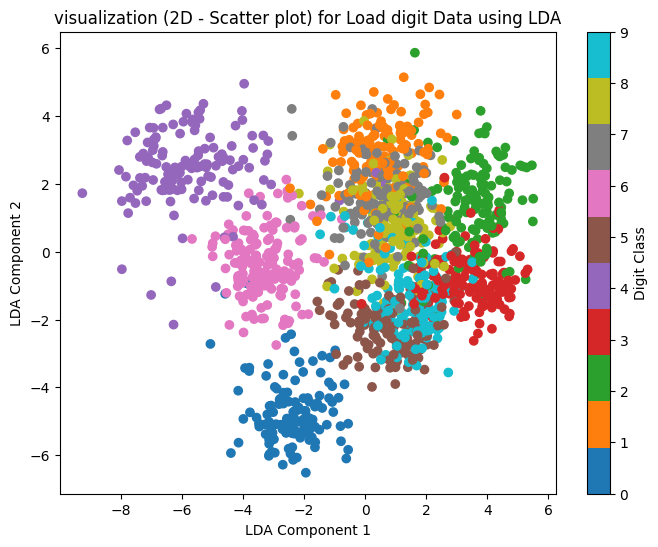

In [ ]:
# for visualization-
x_lda_2d = x_train_lda[:, :2]
plt.figure(figsize=(8,6))
scatter = plt.scatter( x_lda_2d[:,0], # LDA Component 1
                      x_lda_2d[:,1],  # LDA Component 2
                       c = y_train,   # color based on our digit
                       cmap='tab10')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('visualization (2D - Scatter plot) for Load digit Data using LDA')
plt.colorbar(scatter,label='Digit Class')
plt.show()


**Model Building Implementation**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train_lda , y_train)

LogisticRegression()

In [ ]:
model_pred = model.predict(x_test_lda)

In [ ]:
from sklearn.metrics import*

In [ ]:
accuracy_score(y_test,model_pred)

0.9444444444444444